In [85]:
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go 
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Machine learning libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [74]:
# Read in the datasets

df2015 = pd.read_csv('2015.csv')
df2016 = pd.read_csv('2016.csv')
df2017 = pd.read_csv('2017.csv')
df2018 = pd.read_csv('2018.csv')
df2019 = pd.read_csv('2019.csv')

In [75]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [76]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [77]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [78]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [79]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [80]:
# Choropleth map for 2015

data = dict(
        type = 'choropleth',
        locations = df2015['Country'],
        locationmode = 'country names',
        reversescale = True,
        z = df2015['Happiness Score'],
        text = df2015['Country'],
        colorbar = {'title':'Happiness Score'},
      ) 

In [81]:
layout = dict(
    title = '2015 Happiness Score',
    geo = dict(
        projection = {'type':'natural earth'}
    )
)

In [82]:
# May have to run previous cells to see the output.

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [83]:
# Make a combined dataframe for happiness scores
df_happy_all = pd.concat([df2015['Happiness Score'],
                 df2016['Happiness Score'],
                 df2017['Happiness.Score'],
                 df2018['Score'],
                 df2019['Score']], axis=1, keys = [2015,2016,2017,2018,2019])

In [86]:
# Create a boxplot using iplot to see how happiness scores vary year to year
df_happy_all.iplot(kind='box')

In [25]:
# Make combined dataframe for happiness scores by year for Canada
dfAll = pd.concat([df2015[df2015['Country']=='Canada']['Happiness Score'],
                 df2016[df2016['Country']=='Canada']['Happiness Score'],
                 df2017[df2017['Country']=='Canada']['Happiness.Score'],
                 df2018[df2018['Country or region']=='Canada']['Score'],
                 df2019[df2019['Country or region']=='Canada']['Score']])


([<matplotlib.axis.XTick at 0x1c36ea67d30>,
 <a list of 5 Text major ticklabel objects>)

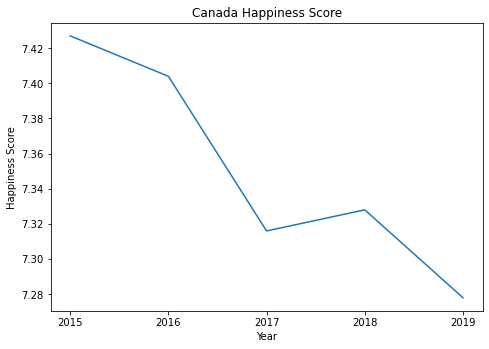

In [36]:
# Create a matplotlib figure to show Canada's Happiness Score over 2015-2019
# There is a pretty noticeable decline in its reduction.
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.plot([2015,2016,2017,2018,2019],dfAll)
ax.set_title('Canada Happiness Score')
ax.set_ylabel('Happiness Score')
ax.set_xlabel('Year')
plt.xticks([2015,2016,2017,2018,2019])

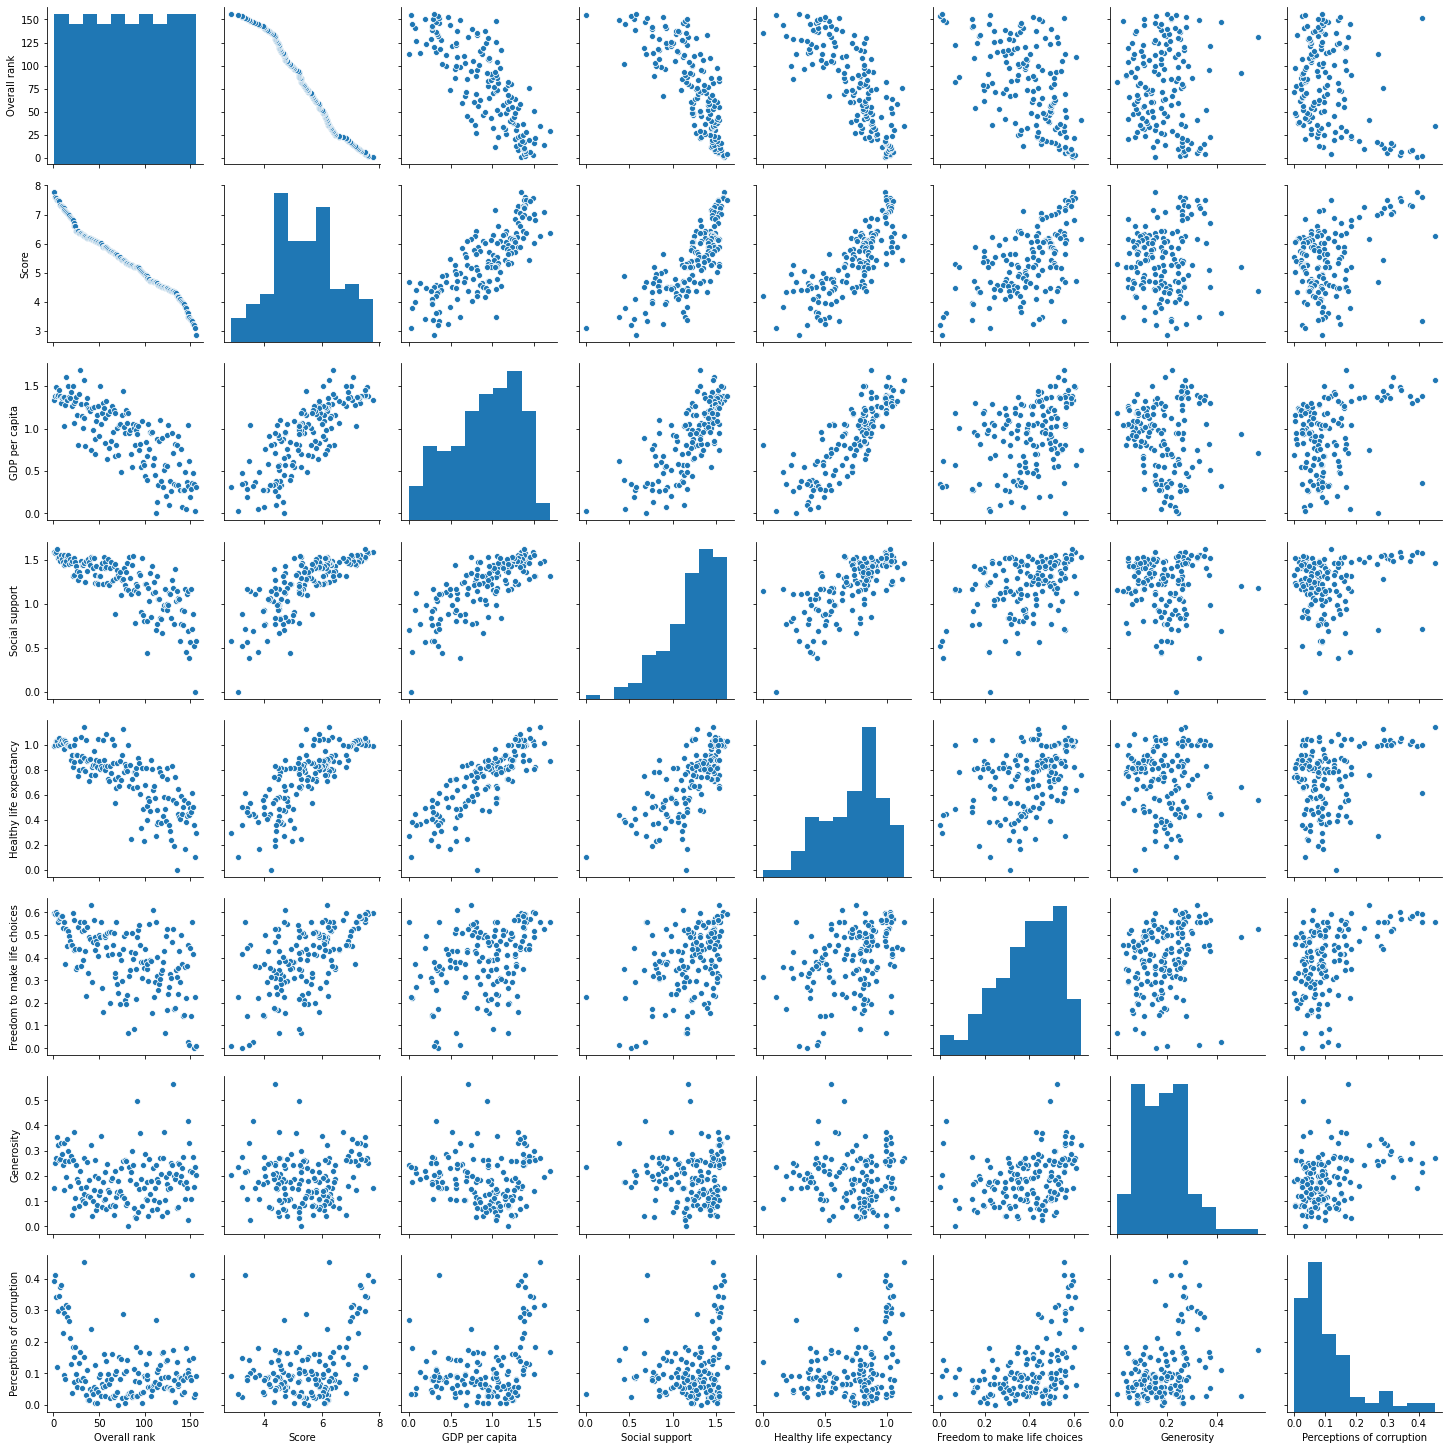

In [38]:
# Let's look at a pairplot for 2019.
sns.pairplot(df2019)

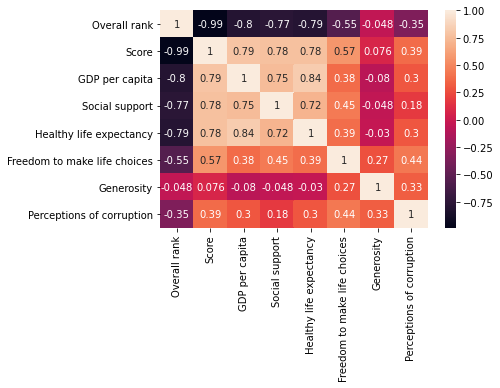

In [39]:
# Get a better sense of the correlations using a heatmap
# As expected, there is a near perfect negative relationship between rank and score.
# We can see that a good score is strongly related to attributed such as GDP and Social support.
sns.heatmap(df2019.corr(),annot=True)

In [42]:
df2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [43]:
# Let's make a Linear Regression model with Scikit Learn.
# We'll try to predict the score of a country in 2019 given the other non-rank factors.
X = df2019[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [44]:
# target attribute: score
y = df2019['Score']

In [45]:
# Split data into training and test data
# 65% training, 35% test
# random_state set so there are similar results, optional
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=21)

In [46]:
# Create and train model with linear regression
lm = LinearRegression()

In [47]:
 # Fit model to training data
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
# Coefficients of the correlation between the X attributes to the y attribute
lm.coef_

array([0.80490934, 1.28770834, 0.83629746, 1.46889133, 1.01432968,
       0.45948386])

In [49]:
X_train.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [50]:
# Coefficient data frame
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [51]:
# If we hold everything else constant, an increase of 1 results in coeff increase in price
cdf

,Coeff
GDP per capita,0.804909
Social support,1.287708
Healthy life expectancy,0.836297
Freedom to make life choices,1.468891
Generosity,1.014330
Perceptions of corruption,0.459484


In [52]:
# Lets see how well our model predicted the test set
predictions = lm.predict(X_test)

In [53]:
# Predicted unlabeled scores
predictions

array([5.75411368, 6.86728219, 5.57524806, 5.23057059, 3.20170821,
       5.6678059 , 6.14699921, 4.13101045, 3.97875692, 7.11875166,
       5.92268203, 4.6980075 , 5.9226453 , 5.72850853, 6.52126889,
       5.04756129, 5.72113202, 3.62780544, 5.60798093, 6.37911962,
       6.98730341, 6.27143447, 5.79653679, 3.90842775, 6.82423976,
       4.8143718 , 5.09555747, 4.17766819, 5.59676   , 4.98891523,
       5.20878626, 6.73498556, 5.68759341, 4.74790355, 5.57018649,
       5.82512001, 4.42489632, 5.39771801, 6.95916191, 4.11836618,
       5.60067848, 4.83339639, 5.30478487, 5.6239687 , 5.82867847,
       5.12980481, 4.36372179, 4.35666986, 5.94837454, 6.10922867,
       3.82538675, 7.04833038, 3.64576582, 4.91637559, 6.26432019])

In [54]:
# Compared to y_test, the actual values from the original set
y_test

129    4.366
6      7.343
83     5.274
132    4.332
155    2.853
85     5.261
19     6.852
117    4.534
142    3.933
2      7.554
86     5.247
88     5.208
62     5.743
93     5.175
20     6.825
106    4.719
52     5.940
131    4.350
26     6.436
23     6.592
7      7.307
40     6.174
91     5.192
149    3.410
21     6.726
137    4.107
81     5.287
150    3.380
74     5.432
73     5.467
147    3.488
14     7.054
130    4.360
123    4.461
44     6.105
42     6.125
143    3.802
60     5.779
10     7.228
140    3.975
92     5.191
125    4.437
108    4.700
45     6.100
41     6.149
70     5.529
95     5.044
127    4.390
46     6.086
38     6.192
113    4.628
3      7.494
101    4.883
87     5.211
29     6.354
Name: Score, dtype: float64

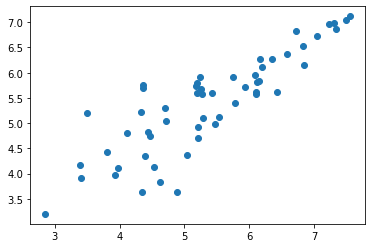

In [55]:
# Lets see how well our model did. An upwards diagonal line suggests the best results
plt.scatter(y_test,predictions)

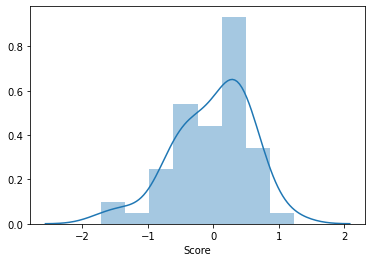

In [56]:
# For a clearer look, a plot of residuals
# Best is a normal distribution
# Pretty good, some room for improvement
sns.distplot((y_test-predictions))

In [57]:
# Calculate error metrics
metrics.mean_absolute_error(y_test,predictions)

0.4766275122029456

In [58]:
metrics.mean_squared_error(y_test,predictions)

0.3446686800089397

In [61]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.5870849001711249